In [1]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
#Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# import Sci-kit learn Libraries for model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
#importing Metrics for Regresion Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
logging.info('sfsfsf')

In [3]:
url = 'https://raw.githubusercontent.com/deva457/CementPrediction_Model/refs/heads/main/Concrete_Data%20(1).csv'

df = pd.read_csv(url)
df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
669,288.0,192.0,0.0,192.0,0.0,932.0,717.8,3,16.11
106,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
648,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
274,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,3,17.22
474,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28,53.39
...,...,...,...,...,...,...,...,...,...
768,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
687,236.0,157.0,0.0,192.0,0.0,972.6,749.1,90,47.78
189,233.8,0.0,94.6,197.9,4.6,947.0,852.2,3,10.38
749,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,14,36.94


In [4]:
# checking data columns
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
'''
OLS METHOD
'''

'\nOLS METHOD\n'

In [6]:
import statsmodels.api as sm
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [7]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Wed, 04 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      20:03:01   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# checking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
# checking Descriptive stats : EDA
# univariate Analysis

from collections import OrderedDict

stats =[]
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'mean':df[i].mean(),
        'median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'standard Deviation':df[i].std(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurt()
        
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)


report

,Feature,mean,median,Q1,Q3,IQR,standard Deviation,skewness,kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


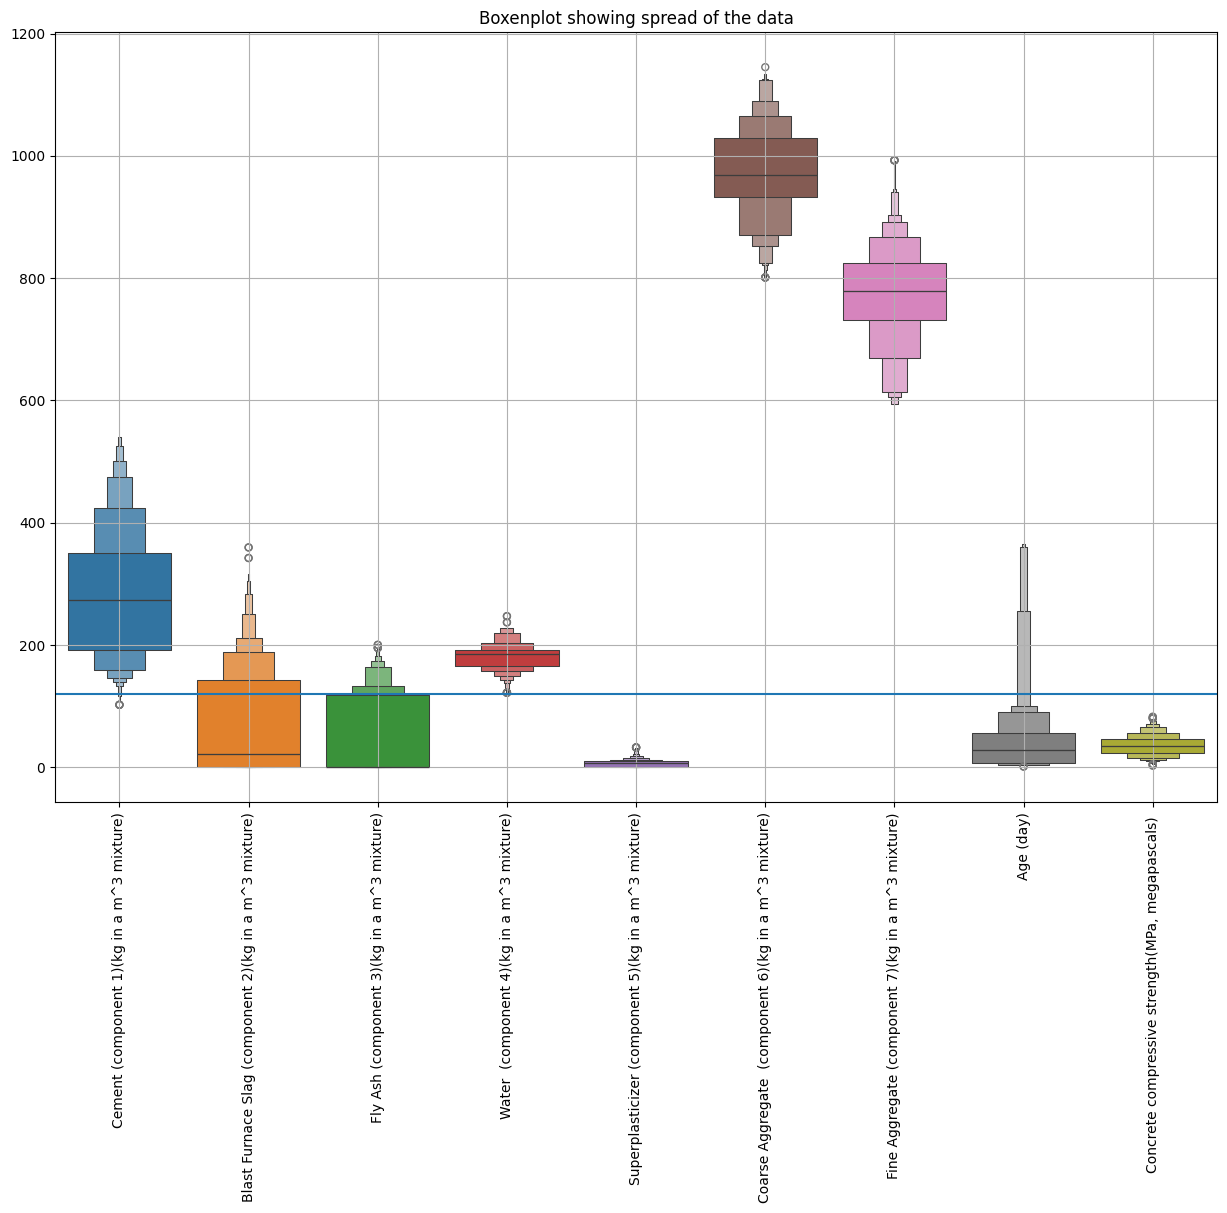

In [10]:
'''
Note :
1.Positive kurtosis : leptokurtic
2.normal distribution : Mesakurtic
3. negative kurtosis : Platykurti

---------------------------------
1.positive Skewness : mode<median<mean
2.no skewness : normally Distributed mean=median=mode
3.negative skewness:mean<median<mode8-0u45

'''

plt.figure(figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title('Boxenplot showing spread of the data')
plt.grid()
plt.show()

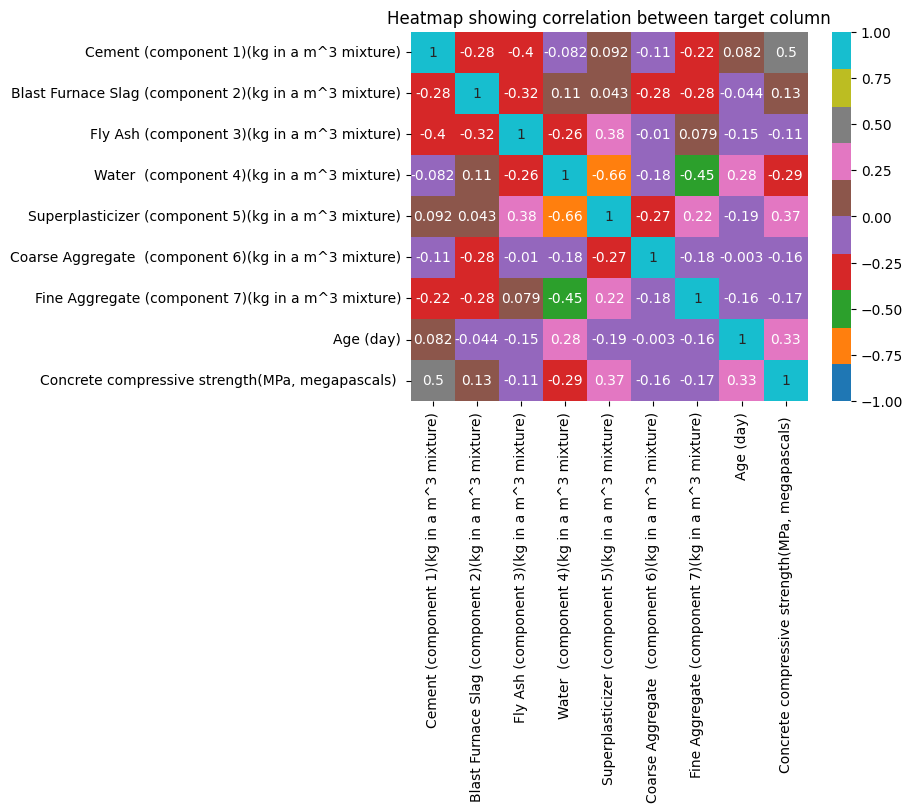

In [11]:
sns.heatmap(df.corr(),annot = True,center = 0,vmax = 1,vmin = -1,cmap = 'tab10')
plt.title('Heatmap showing correlation between target column')
plt.show()

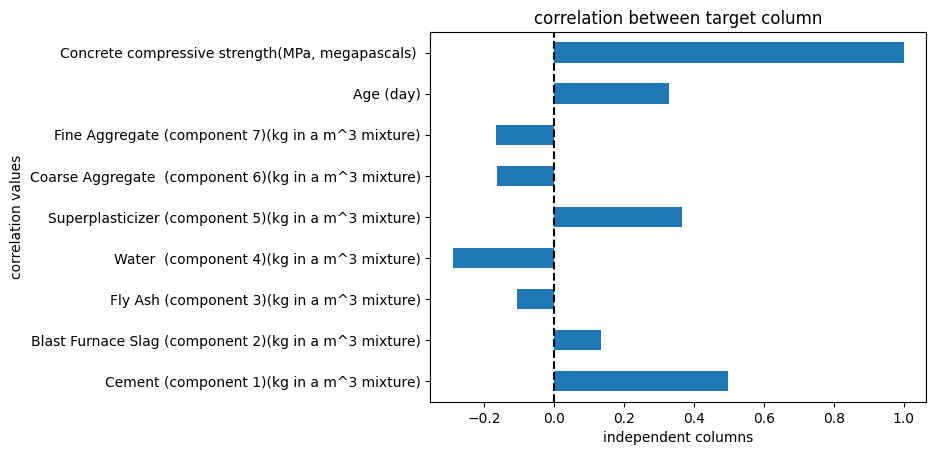

In [12]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh',cmap = 'tab10')
plt.axvline(0,linestyle = '--',color = 'black')
plt.title('correlation between target column')
plt.xlabel('independent columns')
plt.ylabel('correlation values')
plt.show()

In [13]:
# preventing data Leackage

# step 01 : split the dataset into x and y
# where X : independent columns and y : deposite Column : target column
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis =1)
y = df['Concrete compressive strength(MPa, megapascals) ' ]

# step 02 using train test split
# test_size lies between 0.20 to 0.35
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.30,random_state= 42)

X_train

# step 03: using Scaling Technique
sc = MinMaxScaler()

# seen data
X_train = sc.fit_transform(X_train)
# unseen data
X_test = sc.transform(X_test)

In [14]:
X_train.max(),X_train.min()

(np.float64(1.0000000000000002), np.float64(0.0))

In [15]:
# Linear Regression 

from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print('Model Accuracy for Linear Regression ',r2_score(y_test,y_pred_LR))

Model Accuracy for Linear Regression  0.5943782479239215


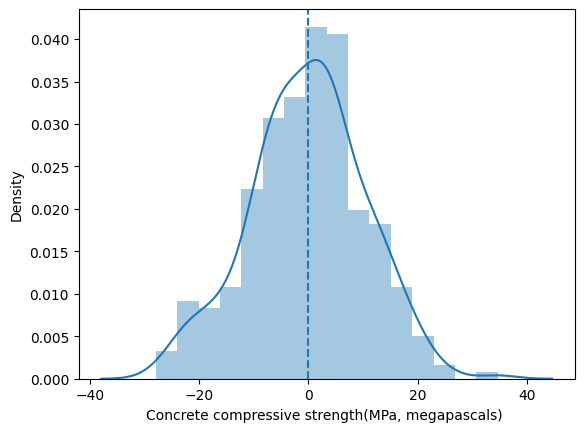

In [16]:
sns.distplot(y_test-y_pred_LR)
plt.axvline(0,linestyle = '--')

Text(0, 0.5, 'Y_pred')

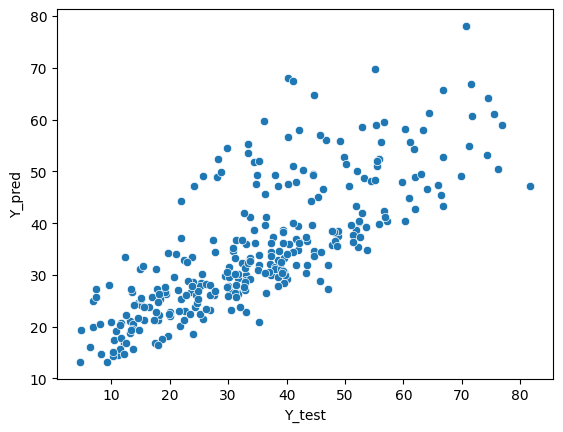

In [17]:
sns.scatterplot(x = y_test,y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')


In [18]:
# Evaluate Coefficient
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [19]:
# Evaluate constant value
LR.intercept_

np.float64(-13.616932642237508)

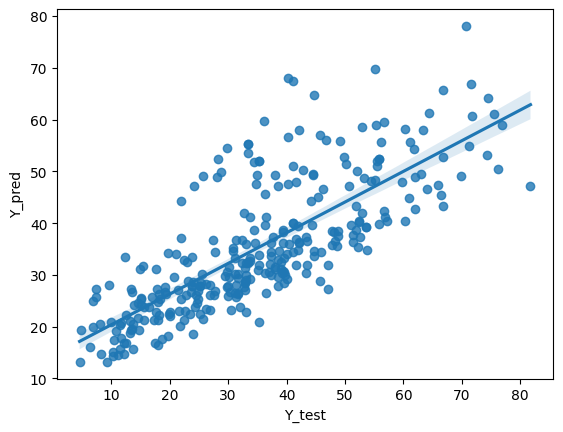

In [20]:
sns.regplot(x = y_test,y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()


In [21]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor


DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)
print('Model Accuracy for Decision Tree Regressor ',r2_score(y_test,y_pred_DT))

Model Accuracy for Decision Tree Regressor  0.8143016164565519


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

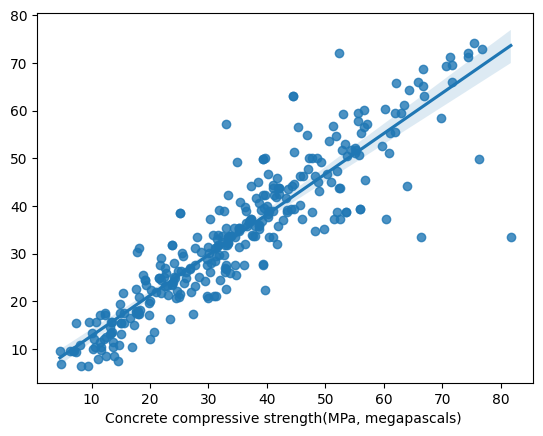

In [22]:
sns.regplot(x = y_test, y = y_pred_DT)

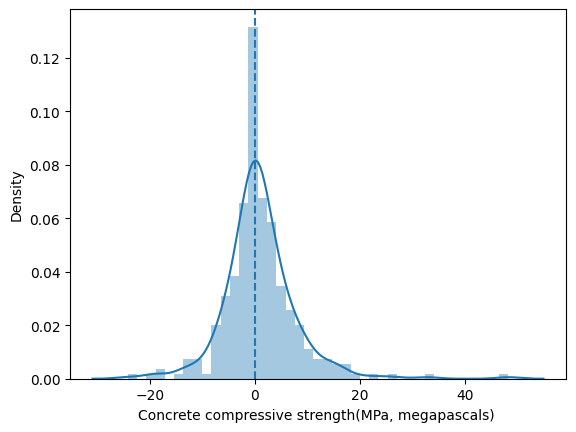

In [23]:
sns.distplot(y_test-y_pred_DT)
plt.axvline(0,linestyle = '--')

In [24]:
# Random forest Regressor
from sklearn.ensemble import RandomForestRegressor


RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print('Model Accuracy for Random Forest Regressor ',r2_score(y_test,y_pred_RF))

Model Accuracy for Random Forest Regressor  0.8855325338066656


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

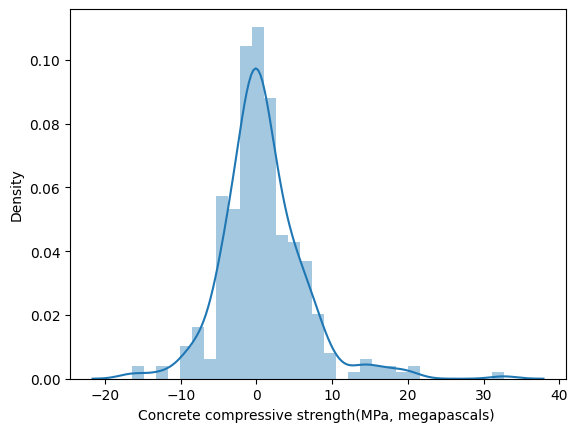

In [25]:
sns.distplot(y_test-y_pred_RF)

<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

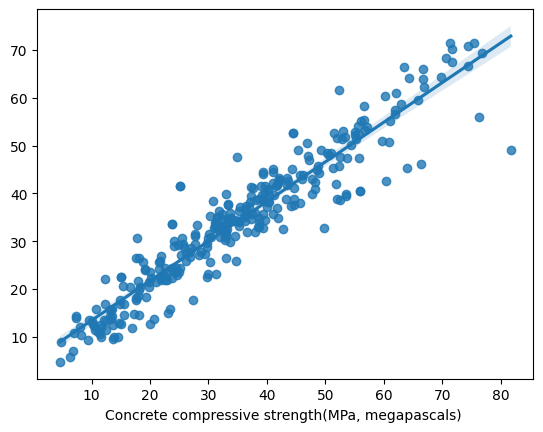

In [26]:
sns.regplot(x = y_test, y = y_pred_RF)

In [27]:
RF.feature_importances_

array([0.33450302, 0.07683037, 0.01934901, 0.10700588, 0.06930447,
       0.02781965, 0.03345843, 0.33172917])

In [30]:
Features = RF.feature_importances_

In [32]:
feature_names = X.columns
importance_df = pd.Series(Features, index=feature_names)
importance_df

Cement (component 1)(kg in a m^3 mixture)                0.334503
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.076830
Fly Ash (component 3)(kg in a m^3 mixture)               0.019349
Water  (component 4)(kg in a m^3 mixture)                0.107006
Superplasticizer (component 5)(kg in a m^3 mixture)      0.069304
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.027820
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.033458
Age (day)                                                0.331729
dtype: float64

In [37]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.4/150.0 MB 19.2 MB/s eta 0:00:08
   -- ------------------------------------- 8.1/150.0 MB 20.7 MB/s eta 0:00:07
   --- ------------------------------------ 12.8/150.0 MB 21.3 MB/s eta 0:00:07
   ---- ----------------------------------- 17.8/150.0 MB 21.9 MB/s eta 0:00:07
   ------ --------------------------------- 23.1/150.0 MB 22.6 MB/s eta 0:00:06
   ------- -------------------------------- 27.8/150.0 MB 22.7 MB/s eta 0:00:06
   -------- ------------------------------- 32.8/150.0 MB 22.7 MB/s eta 0:00:06
   --------- ------------------------------ 37.5/150.0 MB 22.7 MB/s eta 0:00:05
   ----------- ---------------------------- 42.5/150.0 MB 22.9 MB/s eta 0:00:05
   ------------ --------------------------- 47.7/150.0 MB 23.1 MB/s eta 0:00:05
   -------------- ------------------------- 53.0/150.0 MB 23.4 MB/s eta 0:00:05
   --------------- ------------------------ 58.7/15

In [38]:
# using XG Boost Alogrithm

import xgboost as xg


xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print('Model Accuracy for XGBoost Regressor ',r2_score(y_test,y_pred_xgb))

Model Accuracy for XGBoost Regressor  0.9104444067517969


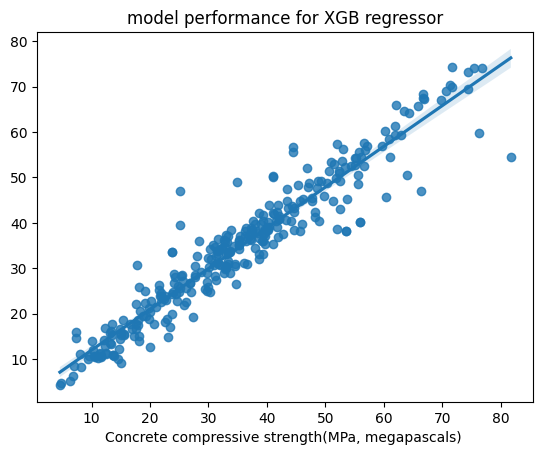

In [41]:
# model performance for XGB
sns.regplot(x = y_test, y= y_pred_xgb)
plt.title('model performance for XGB regressor')
plt.show()

In [42]:
#using ADA boost regressor
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
print('Model Accuracy for ADAboost Regressor ',r2_score(y_test,y_pred_ada))

Model Accuracy for ADAboost Regressor  0.7795969253588191


In [43]:
#using G boost regressor
from sklearn.ensemble import GradientBoostingRegressor

GR = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GR = GR.predict(X_test)
print('Model Accuracy for Gboost Regressor ',r2_score(y_test,y_pred_GR))

Model Accuracy for Gboost Regressor  0.8910572872461324


In [44]:
# KNN Algorithm

from sklearn.neighbors import KNeighborsRegressor

KN = KNeighborsRegressor().fit(X_train,y_train)
y_pred_KN = KN.predict(X_test)
print('Model Accuracy for KN Regressor ',r2_score(y_test,y_pred_KN))


Model Accuracy for KN Regressor  0.6457281524418169
